# 2022 NZMSA Data Science Submission.

In [1]:
import pandas as pd
import seaborn as sns
import datetime

import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis.

In [2]:
dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

,station,valid,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
0,NZAA,2015-01-01 00:00,21.0,11.0,52.77,15.0,NaN,NaN
1,NZAA,2015-01-01 00:30,21.0,10.0,49.37,16.0,NaN,NaN
2,NZAA,2015-01-01 01:00,21.0,12.0,56.38,16.0,NaN,NaN
3,NZAA,2015-01-01 01:30,21.0,13.0,60.21,16.0,NaN,NaN
4,NZAA,2015-01-01 02:00,21.0,12.0,56.38,16.0,NaN,NaN


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0    station        103713 non-null  object 
 1   valid           103713 non-null  object 
 2   tmpc            103678 non-null  float64
 3   dwpc            103678 non-null  float64
 4   relh            103593 non-null  float64
 5   sknt            103704 non-null  float64
 6   gust            1203 non-null    float64
 7   peak_wind_drct  0 non-null       float64
dtypes: float64(6), object(2)
memory usage: 6.3+ MB


In [11]:
# convert valid column to datetime format
dataset['valid'] = pd.to_datetime(dataset['valid'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103713 entries, 0 to 103712
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0    station        103713 non-null  object        
 1   valid           103713 non-null  datetime64[ns]
 2   tmpc            103678 non-null  float64       
 3   dwpc            103678 non-null  float64       
 4   relh            103593 non-null  float64       
 5   sknt            103704 non-null  float64       
 6   gust            1203 non-null    float64       
 7   peak_wind_drct  0 non-null       float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 6.3+ MB


In [12]:
# Description.
# Mean - Average value of the data.
# std (Standard Deviation) - How far away from the mean is the overall data?
# 25% - The 25th percentile value.
# 75% - The 75th percentile value.
dataset.describe()

,tmpc,dwpc,relh,sknt,gust,peak_wind_drct
count,103678.000000,103678.000000,103593.000000,103704.000000,1203.000000,0.0
mean,15.811503,12.115772,79.782307,8.919029,30.962594,NaN
std,4.235197,3.738005,12.562199,5.348379,6.319510,NaN
min,2.000000,-2.000000,29.230000,0.000000,13.000000,NaN
25%,13.000000,9.000000,71.450000,5.000000,27.000000,NaN
50%,16.000000,12.000000,81.990000,8.000000,31.000000,NaN
75%,19.000000,15.000000,88.180000,12.000000,35.000000,NaN
max,29.000000,23.000000,100.000000,42.000000,56.000000,NaN


<AxesSubplot:>

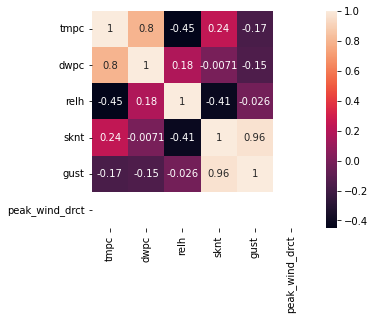

In [13]:
# Correlation plot.
# Values nearing one or negative one can have a pattern where a(x) = k*b(x)
# Values closer to the 0 value indicates the plot of a(x) and b(x) has no noticeable pattern.

sns.heatmap(dataset.corr(), annot=True, square=True)

C:\Users\Angela (school)\AppData\Local\Temp\ipykernel_23324\3038520501.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


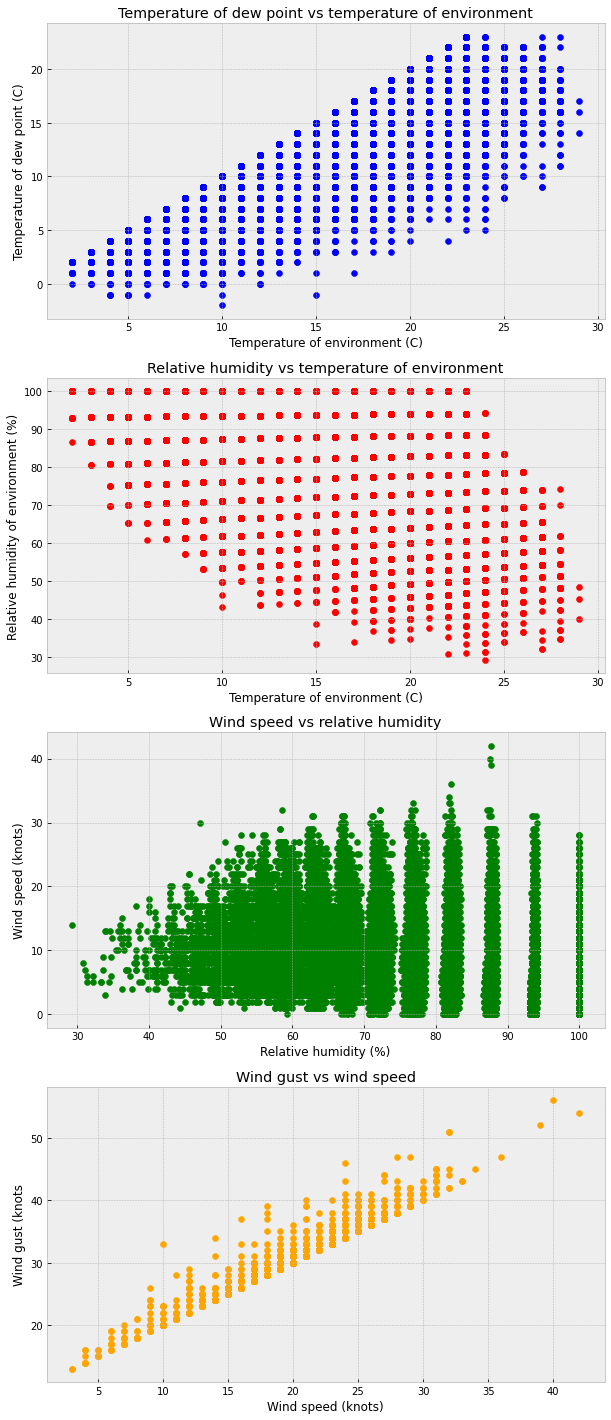

In [21]:
# plots of numerical sections of data set
plt.style.use("bmh")
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, squeeze=True)

ax1.scatter(dataset["tmpc"], dataset["dwpc"], color="blue")
ax1.set_title("Temperature of dew point vs temperature of environment")
ax1.set_xlabel("Temperature of environment (C)")
ax1.set_ylabel("Temperature of dew point (C)")

ax2.scatter(dataset["tmpc"], dataset["relh"], color="red")
ax2.set_title("Relative humidity vs temperature of environment")
ax2.set_xlabel("Temperature of environment (C)")
ax2.set_ylabel("Relative humidity of environment (%)")

ax3.scatter(dataset["relh"], dataset["sknt"], color="green")
ax3.set_title("Wind speed vs relative humidity")
ax3.set_xlabel("Relative humidity (%)")
ax3.set_ylabel("Wind speed (knots)")

ax4.scatter(dataset["sknt"], dataset["gust"], color="orange")
ax4.set_title("Wind gust vs wind speed")
ax4.set_xlabel("Wind speed (knots)")
ax4.set_ylabel("Wind gust (knots")

fig.set_size_inches(10,25)

fig.show()

C:\Users\Angela (school)\AppData\Local\Temp\ipykernel_23324\4051157079.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


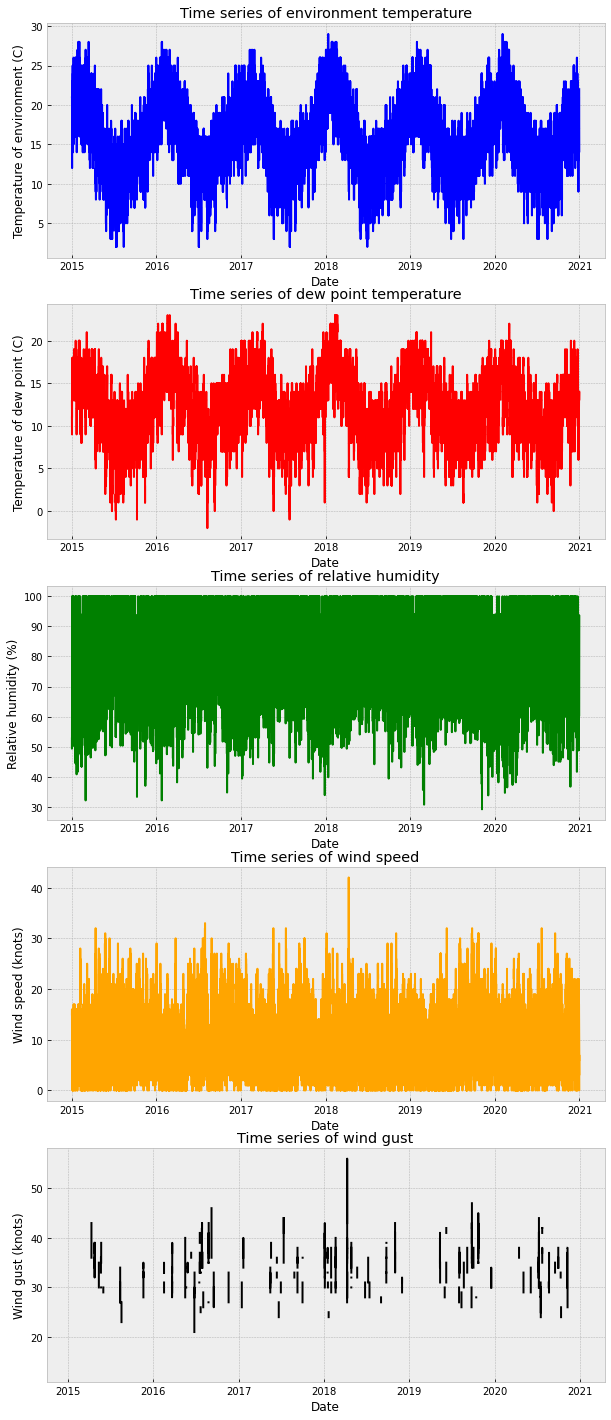

In [22]:
# time series plots
plt.style.use("bmh")
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, squeeze=True)

ax1.plot(dataset["valid"], dataset["tmpc"], color="blue")
ax1.set_title("Time series of environment temperature")
ax1.set_xlabel("Date")
ax1.set_ylabel("Temperature of environment (C)")

ax2.plot(dataset["valid"], dataset["dwpc"], color="red")
ax2.set_title("Time series of dew point temperature")
ax2.set_xlabel("Date")
ax2.set_ylabel("Temperature of dew point (C)")

ax3.plot(dataset["valid"], dataset["relh"], color="green")
ax3.set_title("Time series of relative humidity")
ax3.set_xlabel("Date")
ax3.set_ylabel("Relative humidity (%)")

ax4.plot(dataset["valid"], dataset["sknt"], color="orange")
ax4.set_title("Time series of wind speed")
ax4.set_xlabel("Date")
ax4.set_ylabel("Wind speed (knots)")

ax5.plot(dataset["valid"], dataset["gust"], color="black")
ax5.set_title("Time series of wind gust")
ax5.set_xlabel("Date")
ax5.set_ylabel("Wind gust (knots)")

fig.set_size_inches(10,25)

fig.show()

# Data Processing

In [ ]:
# An exhaustive list of what you can do with Pandas dataframe is in this link: https://pandas.pydata.org/docs/reference/frame.html

# Data Modelling

In [ ]:
# An exhaustive list of models can be found in sci-kit learn in this link: https://scikit-learn.org/stable/supervised_learning.html
# The url takes you to supervised learning which is what you will be dealing with for this phase.

# Conclusion

* Comment on your model performance.
* Anything interesting about the data analysis.